Датасет 2. Задача предсказания трафика (traffic_volume) по остальным параметрам.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Загрузка данных.

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'datasets', 'metro.csv')
def load_data(data_path=DATA_PATH):
    return pd.read_csv(data_path)

In [3]:
data = load_data()
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


Просмотрим имена всех признаков.

In [4]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

Просмотрим характеристики датасета.

In [5]:
data.describe(include='all')

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
count,33750,33750,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750,33750,33750.000000
unique,28589,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,38,NaN
top,2013-05-19 10:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN
freq,6,33707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11213,7524,NaN
mean,NaN,NaN,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,NaN,NaN,3240.118163
std,NaN,NaN,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,NaN,NaN,1991.487289
min,NaN,NaN,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,NaN,NaN,1165.250000
50%,NaN,NaN,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,NaN,NaN,3335.000000
75%,NaN,NaN,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,NaN,NaN,4926.000000


In [6]:
print(data['rain_p_h'].max())
print(data['temperature'].min())

9831.3
0.0


Количество записей в каждом из столбцов одинаково и равняется 33750. Параметр rain_p_h имеет аномально большое максимальное значение (9.83 метра осадков за час). Минимальное значение температуры также экстремально низкое (-273.15 градусов Цельсия). Это свидетельствует о наличии выбросов в данных.

Заменим данные значения на медианные.

In [7]:
data['rain_p_h'] = data['rain_p_h'].replace(data['rain_p_h'].max(), data['rain_p_h'].median())
data['temperature'] = data['temperature'].replace(data['temperature'].min(), data['temperature'].median())

In [8]:
data.describe(include='all')

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
count,33750,33750,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750,33750,33750.000000
unique,28589,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,38,NaN
top,2013-05-19 10:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN
freq,6,33707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11213,7524,NaN
mean,NaN,NaN,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.152595,0.157441,0.000318,50.458785,NaN,NaN,3240.118163
std,NaN,NaN,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,12.518799,1.158500,0.009760,38.871734,NaN,NaN,1991.487289
min,NaN,NaN,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,243.390000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.722500,0.000000,0.000000,1.000000,NaN,NaN,1165.250000
50%,NaN,NaN,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,NaN,NaN,3335.000000
75%,NaN,NaN,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,NaN,NaN,4926.000000


Теперь данные выглядят более правдоподобно.

Проверим наличие пропусков в данных.

In [9]:
data.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

Датасет не имеет пропущенных данных.

Посмотрим тип данных для каждого столбца.

In [10]:
data.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

Признак date_time имеет тип object. Преобразуем его в правильный формат даты и времени и разобъем дату на отдельные составляющие.

In [11]:
data.date_time = pd.to_datetime(data.date_time)

data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['day_of_week'] = data['date_time'].dt.dayofweek.replace([0, 1, 2, 3, 4, 5, 6], 
                                                          ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
data['hour'] = data['date_time'].dt.hour

data.drop('date_time', axis=1, inplace=True)

In [12]:
data.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,day_of_week,hour
0,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,tuesday,9
1,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,tuesday,10
2,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,tuesday,11
3,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,tuesday,12
4,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,tuesday,13


Посмотрим на распределение данных.

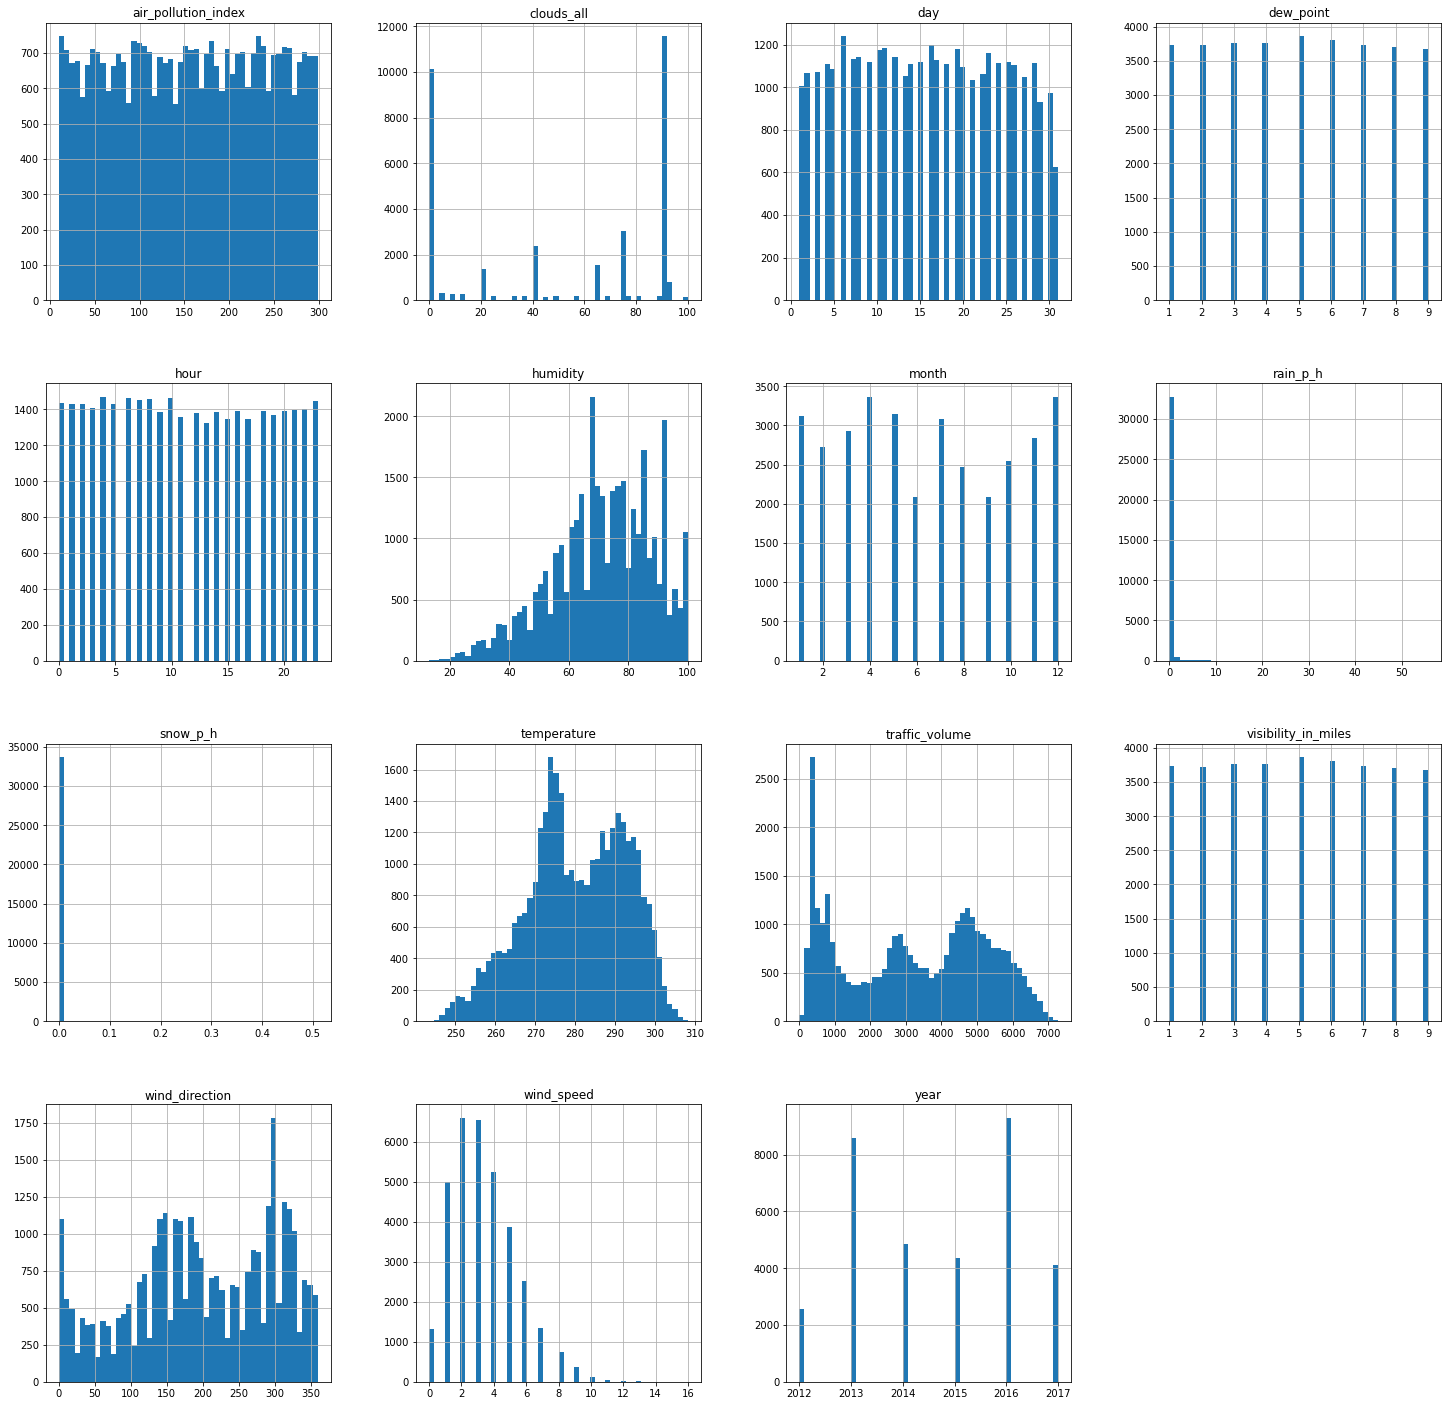

In [13]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

Проанализируем некоторые признаки.

Построим график, отображающий объем трафика в зависимости от часа.

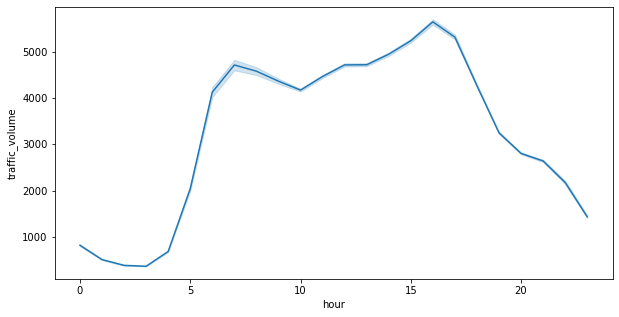

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['hour'], y=data['traffic_volume'])

Как видно из графика, трафик возрастает в период с 6 до 18 часов. Ближе к ночи трафик спадает и возрастает, когда начинается день. На графике видно 2 пика в утреннее и вечернее время. Это может быть связано с тем, что жители используют метро в это время чтобы добраться до работы, а позже чтобы вернуться с нее.

Построим график, отображающий объем трафика в зависимости от часа и дня недели.

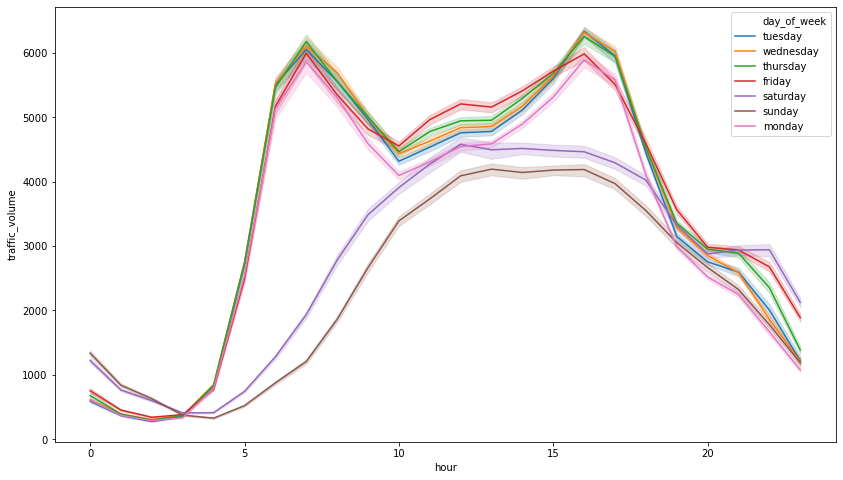

In [15]:
plt.figure(figsize=(14,8))
sns.lineplot(x=data['hour'], y=data['traffic_volume'], hue=data['day_of_week'])

Из графика видно, что трафик наименьший в субботу и воскресенье. Утренний объем трафика в эти дни намного меньше, чем в рабочие дни, так как людям не надо ехать на работу. В рабочие дни трафик примерно одинаковый.

Построим графики, отображающие объем трафика в зависимости от числа, месяца и года.

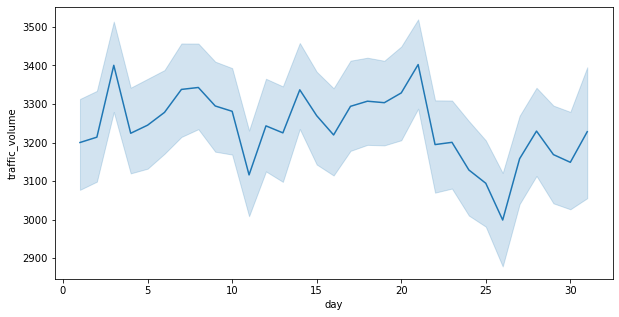

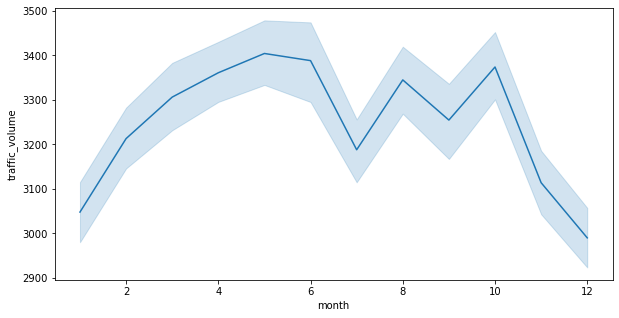

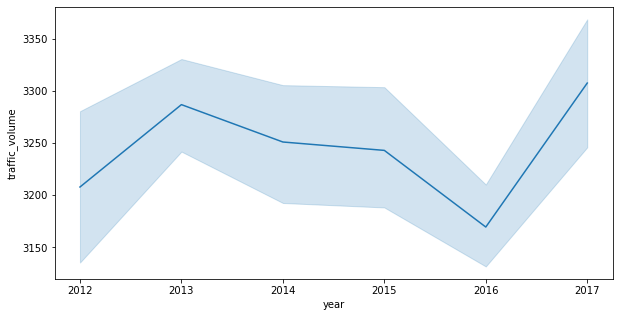

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['day'], y=data['traffic_volume'])

plt.figure(figsize=(10,5))
sns.lineplot(x=data['month'], y=data['traffic_volume'])

plt.figure(figsize=(10,5))
sns.lineplot(x=data['year'], y=data['traffic_volume'])

День, месяц и год не оказывают существенного влияния на трафик.

In [17]:
data['is_holiday'].value_counts()

None                         33707
Thanksgiving Day                 5
New Years Day                    5
Christmas Day                    5
Veterans Day                     4
Labor Day                        4
Columbus Day                     4
Washingtons Birthday             4
Memorial Day                     3
Martin Luther King Jr Day        3
State Fair                       3
Independence Day                 3
Name: is_holiday, dtype: int64

Как видно, праздничных дней очень мало, поэтому этот признак не подходит для предсказания трафика.

In [18]:
data['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

В большинстве случаев погода облачная или ясная.

Составим корреляционную матрицу.

In [19]:
corr_matrix = data.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume         1.000000
hour                   0.348867
temperature            0.130629
clouds_all             0.037922
humidity               0.016455
wind_speed             0.016329
wind_direction         0.014278
dew_point              0.001348
visibility_in_miles    0.001348
snow_p_h               0.001197
air_pollution_index   -0.003751
year                  -0.006714
month                 -0.015371
day                   -0.018919
rain_p_h              -0.029060
Name: traffic_volume, dtype: float64

Наибольшую по модулю корреляцию имеют признаки hour и temperature.

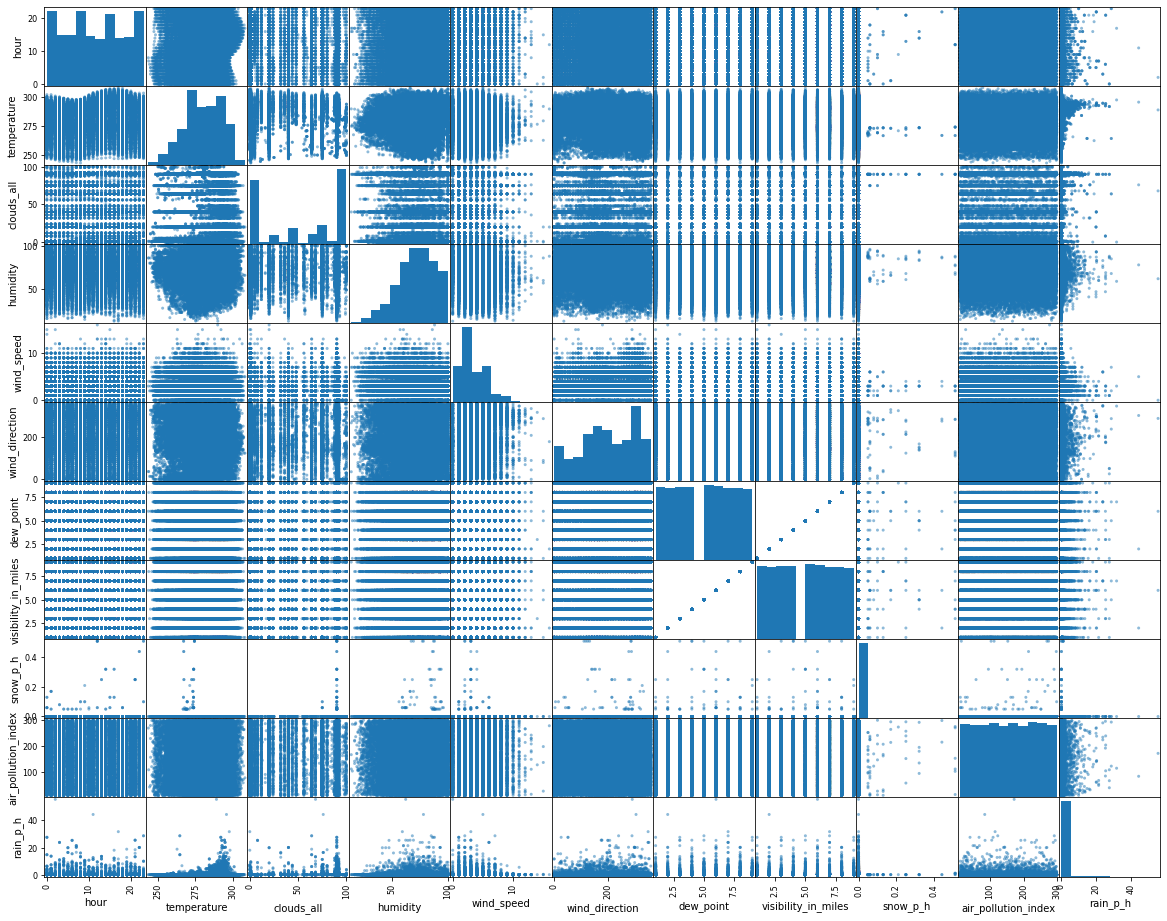

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['hour', 'temperature', 'clouds_all', 'humidity', 'wind_speed', 'wind_direction', 'dew_point',
             'visibility_in_miles', 'snow_p_h', 'air_pollution_index', 'rain_p_h']
scatter_matrix(data[attributes], figsize=(20, 16));

Можно заметить, что параметры dew_point и visibility_in_miles сильно коррелируют между собой.

Для решения поставленной задачи стоит взять признаки hour и temperature, так как они оказывают наибольшее влияние на трафик.